# Application of Logistic Regression (Scratch) for Predicting Passenger Survival on the Titanic Dataset

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [5]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [6]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [7]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


## Logistics Regression

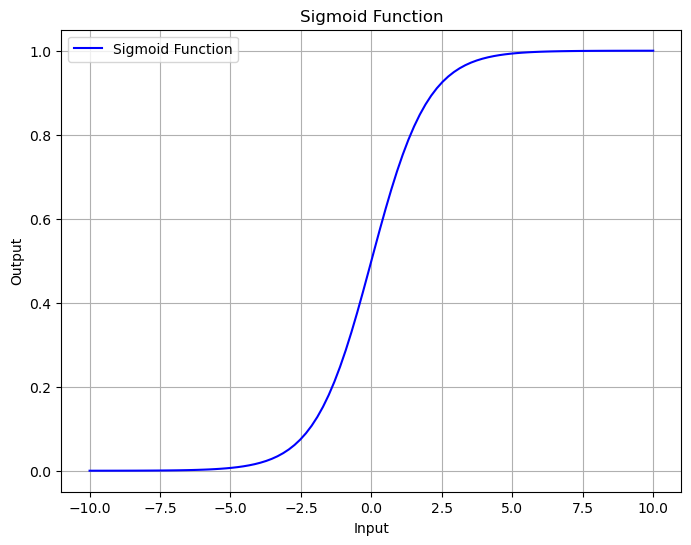

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)
# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
from ml_from_scratch.logistic_regression import model

In [12]:
iterations = 100000
learning_rate = 0.001
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iteration is: 0.6931471805599454
Cost after 10000 iteration is: 0.518318504952069
Cost after 20000 iteration is: 0.4824535103198253
Cost after 30000 iteration is: 0.46674899820135907
Cost after 40000 iteration is: 0.4591687984641674
Cost after 50000 iteration is: 0.45517763749795936
Cost after 60000 iteration is: 0.45289001499072096
Cost after 70000 iteration is: 0.4514605979486101
Cost after 80000 iteration is: 0.45048756833993997
Cost after 90000 iteration is: 0.4497708938942782


## Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

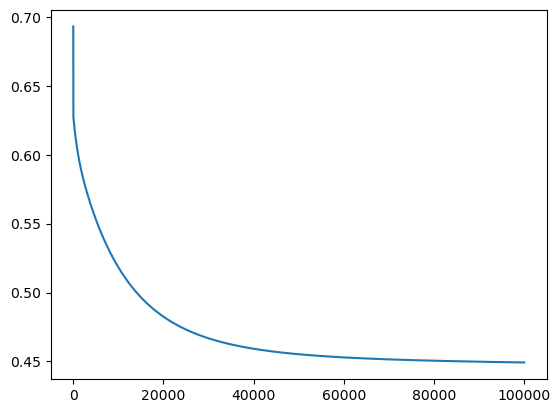

In [13]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

## Testing Model Accuracy

In [14]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [15]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  92.11 %
